**1. Installl and Import the necessary libraries**

In [1]:
!pip install pandas geopandas matplotlib

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

**2. Reading data**

In [6]:
#Reading Municipalities in philadelphia
#Provide shp and shx file
geojson_file = "PaMunicipalities2024_03.shp"
gdf = gpd.read_file(geojson_file)

In [7]:
gdf.head()

,geometry
0,"POLYGON ((-8622753.535 4997597.032, -8623347.4..."
1,"POLYGON ((-8593056.817 5093180.349, -8589807.3..."
2,"POLYGON ((-8406086.742 5098903.126, -8403633.0..."
3,"MULTIPOLYGON (((-8725397.515 4946748.92, -8725..."
4,"POLYGON ((-8426004.323 5067348.627, -8426290.4..."


In [10]:
column_list = gdf.columns.tolist()
column_list

['geometry']

In [13]:
gdf['area'] = gdf.area
gdf['area_km2'] = gdf['area'] / 1000000
gdf['boundary'] = gdf.boundary
gdf['boundary_length'] = gdf['boundary'].length
gdf['centroid'] = gdf.centroid
gdf['centroid_x'] = gdf['centroid'].x
gdf['centroid_y'] = gdf['centroid'].y

In [14]:
column_list = gdf.columns.tolist()
column_list

['geometry',
 'area',
 'area_km2',
 'boundary',
 'boundary_length',
 'centroid',
 'centroid_x',
 'centroid_y']

In [15]:
gdf.head()

,geometry,area,area_km2,boundary,boundary_length,centroid,centroid_x,centroid_y
0,"POLYGON ((-8622753.535 4997597.032, -8623347.4...",1.282775e+08,128.277464,"LINESTRING (-8622753.535 4997597.032, -8623347...",60240.104774,POINT (-8626265.946 4991238.557),-8.626266e+06,4.991239e+06
1,"POLYGON ((-8593056.817 5093180.349, -8589807.3...",1.654867e+08,165.486729,"LINESTRING (-8593056.817 5093180.349, -8589807...",55811.863601,POINT (-8584052.591 5089002.942),-8.584053e+06,5.089003e+06
2,"POLYGON ((-8406086.742 5098903.126, -8403633.0...",1.480936e+07,14.809360,"LINESTRING (-8406086.742 5098903.126, -8403633...",16870.165024,POINT (-8405184.655 5096986.993),-8.405185e+06,5.096987e+06
3,"MULTIPOLYGON (((-8725397.515 4946748.92, -8725...",2.108245e+08,210.824520,"MULTILINESTRING ((-8725397.515 4946748.92, -87...",130912.772483,POINT (-8730038.573 4942689.262),-8.730039e+06,4.942689e+06
4,"POLYGON ((-8426004.323 5067348.627, -8426290.4...",1.172628e+08,117.262790,"LINESTRING (-8426004.323 5067348.627, -8426290...",70454.442729,POINT (-8422970.38 5072178.78),-8.422970e+06,5.072179e+06


In [17]:
crs = gdf.crs
crs

In [19]:
# Based on the coordinate magnitudes, we assume the CRS is Web Mercator (EPSG:3857)
gdf.crs = 'EPSG:3857'

# Verify the CRS has been set
print(gdf.crs)

EPSG:3857


In [20]:
# Now that the CRS is set, we can transform it to EPSG:26910
gdf_26910 = gdf.to_crs(epsg=26910)
display(gdf_26910.head())

,geometry,area,area_km2,boundary,boundary_length,centroid,centroid_x,centroid_y
0,"POLYGON ((4353029.803 5658804.55, 4352772.099 ...",1.282775e+08,128.277464,"LINESTRING (-8622753.535 4997597.032, -8623347...",60240.104774,POINT (-8626265.946 4991238.557),-8.626266e+06,4.991239e+06
1,"POLYGON ((4327380.535 5744156.627, 4329725.365...",1.654867e+08,165.486729,"LINESTRING (-8593056.817 5093180.349, -8589807...",55811.863601,POINT (-8584052.591 5089002.942),-8.584053e+06,5.089003e+06
2,"POLYGON ((4460963.776 5844417.831, 4462657.974...",1.480936e+07,14.809360,"LINESTRING (-8406086.742 5098903.126, -8403633...",16870.165024,POINT (-8405184.655 5096986.993),-8.405185e+06,5.096987e+06
3,"MULTIPOLYGON (((4300791.9 5570114.507, 4300588...",2.108245e+08,210.824520,"MULTILINESTRING ((-8725397.515 4946748.92, -87...",130912.772483,POINT (-8730038.573 4942689.262),-8.730039e+06,4.942689e+06
4,"POLYGON ((4462976.913 5811011.127, 4462641.352...",1.172628e+08,117.262790,"LINESTRING (-8426004.323 5067348.627, -8426290...",70454.442729,POINT (-8422970.38 5072178.78),-8.422970e+06,5.072179e+06


In [25]:
centroid_point=gdf_26910.loc[2]['centroid']
gdf_26910['diff'] = gdf_26910['centroid'].distance(centroid_point)


In [26]:
display(gdf_26910['diff'])

,diff
0,245070.742863
1,179046.037574
2,0.000000
3,359635.728958
4,30525.063205
...,...
2566,587931.462241
2567,582757.155114
2568,506753.927885
2569,107399.919795


**3.Visualizing Geospatial Data**

In [27]:
#Set high resolution for better quality plots
plt.rcParams['figure.dpi'] = 150

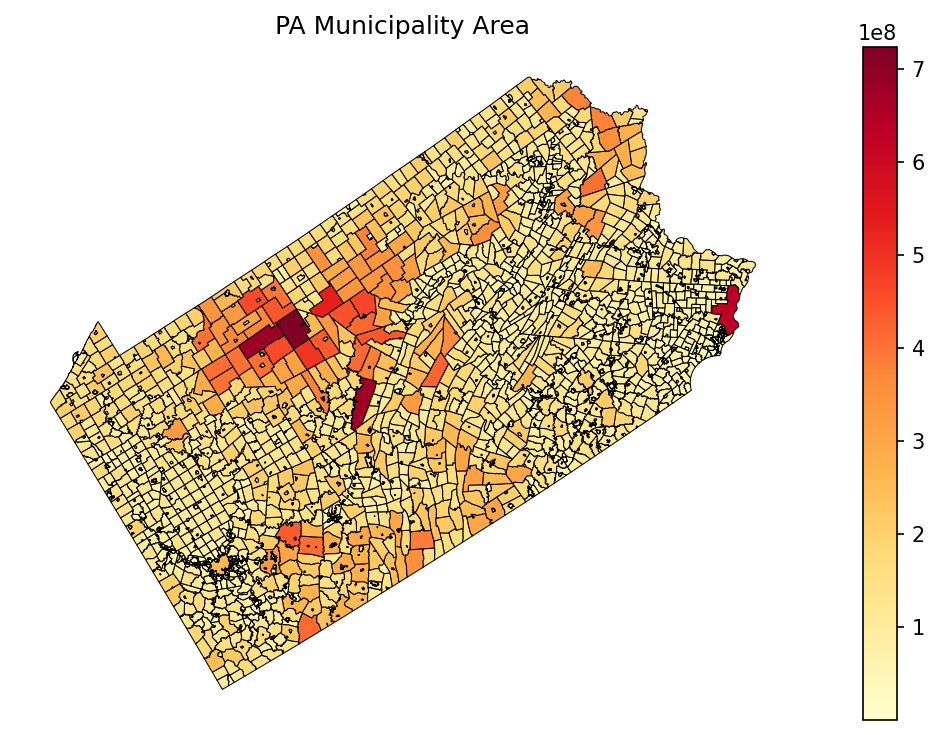

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
gdf_26910.plot(column='area',
               ax=ax,
               cmap='YlOrRd',
               legend=True,
               edgecolor='black',
               linewidth=0.5)

plt.title('PA Municipality Area')
plt.axis('off')
plt.tight_layout()
plt.show()

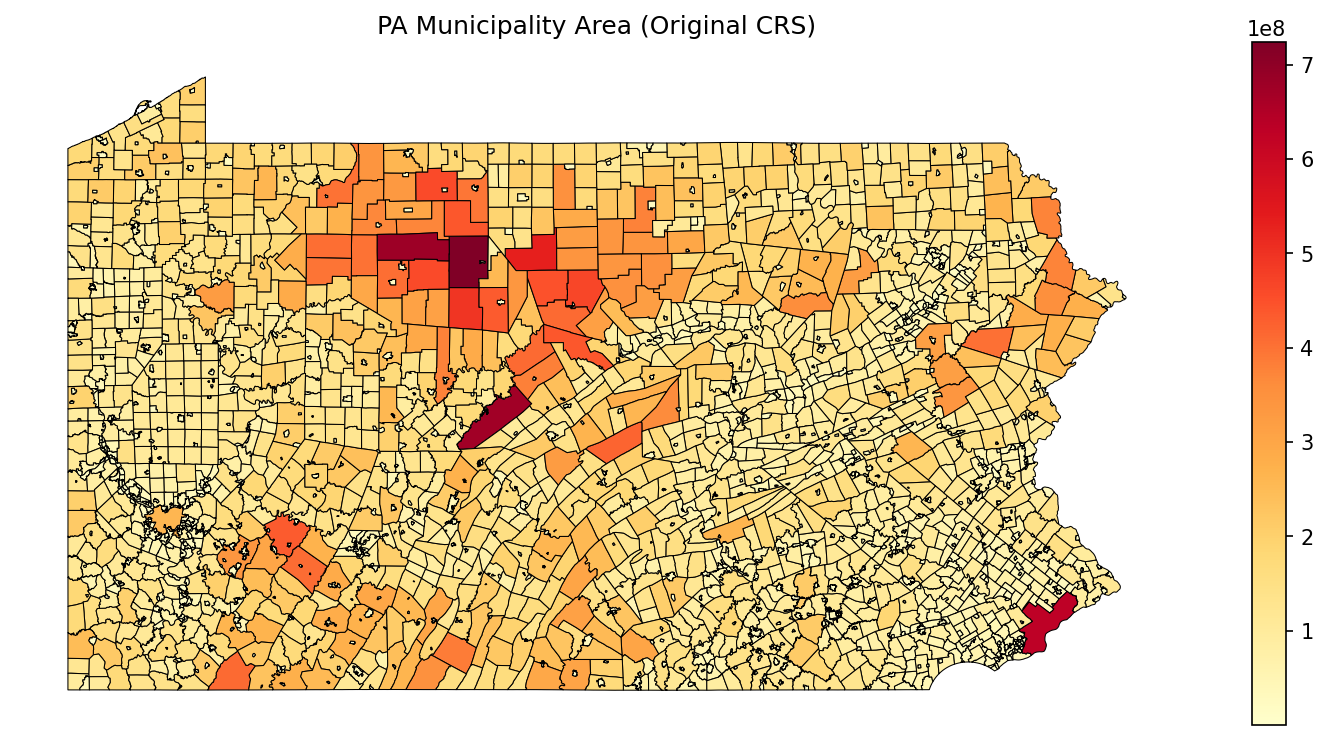

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
gdf.plot(column='area',
               ax=ax,
               cmap='YlOrRd',
               legend=True,
               edgecolor='black',
               linewidth=0.5)

plt.title('PA Municipality Area (Original CRS)')
plt.axis('off')
plt.tight_layout()
plt.show()